**AI Predictive Maintenance in steel plants**

Dataset Description

https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

The AI4I 2020 dataset is a synthetic dataset designed to assist in building and testing models for predictive maintenance tasks in industrial environments. It mimics the behavior of machines over time by generating realistic operational data, offering a valuable foundation for research in equipment failure prediction and anomaly detection. 

The dataset includes several key features that describe the machine’s operating conditions. These are Air Temperature (the surrounding environmental temperature), Process Temperature (the internal machine temperature during operation), Rotational Speed (how fast the machine parts are moving), Torque (the rotational force applied), and Tool Wear (the wear accumulated by tools over time). Additionally, the Product Type feature categorizes the type of item being produced, which may impact machine wear and stress differently.

As for the targets, the dataset provides a primary Machine Failure label, a binary indicator where 1 represents a failure event and 0 indicates normal operation. It further breaks down failures into five specific types: Tool Wear Failure (TWF), Heat Dissipation Failure (HDF), Power Failure (PWF), Overstrain Failure (OSF), and Random Failure (RNF). This detailed labeling allows for more refined modeling of different failure mechanisms. 

Generally, The AI4I 2020 dataset is mainly used for binary classification, where the goal is to predict machine failure (1/0).


The AI4I 2020 Predictive Maintenance Dataset is a publicly available dataset provided by UDACITY and Siemens for predictive maintenance modeling. It simulates sensor readings and operational settings of industrial machines to predict potential failures. The goal is to use this data to predict the condition of the machine (normal/failure) and help organizations minimize unplanned downtime and optimize maintenance schedules.

**Exploratory Data Analysis**

*1: Import required liberaries, load the dataset and describing it*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

*2: Load the dataset and display first five rows*

In [7]:
df = pd.read_csv('../data/ai4i2020.csv')
pd.set_option('display.width',150)
pd.set_option('display.max_columns', None)
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0    1     M14860    M                298.1                    308.6                    1551         42.8                0                0    0   
1    2     L47181    L                298.2                    308.7                    1408         46.3                3                0    0   
2    3     L47182    L                298.1                    308.5                    1498         49.4                5                0    0   
3    4     L47183    L                298.2                    308.6                    1433         39.5                7                0    0   
4    5     L47184    L                298.2                    308.7                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    

*3: Dataset information*

In [9]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float

*N.B According to the output result, the data doesn't have missing values*

*4: check for duplicates*

In [12]:
if df.duplicated().any():
    df[duplicates]
else:
    print("No Duplicates")

No Duplicates


*5: Check if there is unique column(no effect in our model if we drop it)*

In [14]:
for col in df.columns:
    if df[col].is_unique:
        print(f"✅ '{col}' is unique for every row.")

✅ 'UDI' is unique for every row.
✅ 'Product ID' is unique for every row.


*7: Basic statistics*

In [16]:
print("\nDataset Statistics:")
print(df.describe())


Dataset Statistics:
               UDI  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count  10000.00000         10000.000000             10000.000000            10000.000000  10000.000000     10000.000000     10000.000000   
mean    5000.50000           300.004930               310.005560             1538.776100     39.986910       107.951000         0.033900   
std     2886.89568             2.000259                 1.483734              179.284096      9.968934        63.654147         0.180981   
min        1.00000           295.300000               305.700000             1168.000000      3.800000         0.000000         0.000000   
25%     2500.75000           298.300000               308.800000             1423.000000     33.200000        53.000000         0.000000   
50%     5000.50000           300.100000               310.100000             1503.000000     40.100000       108.000000         0.000000   

*8: Feature distributions*

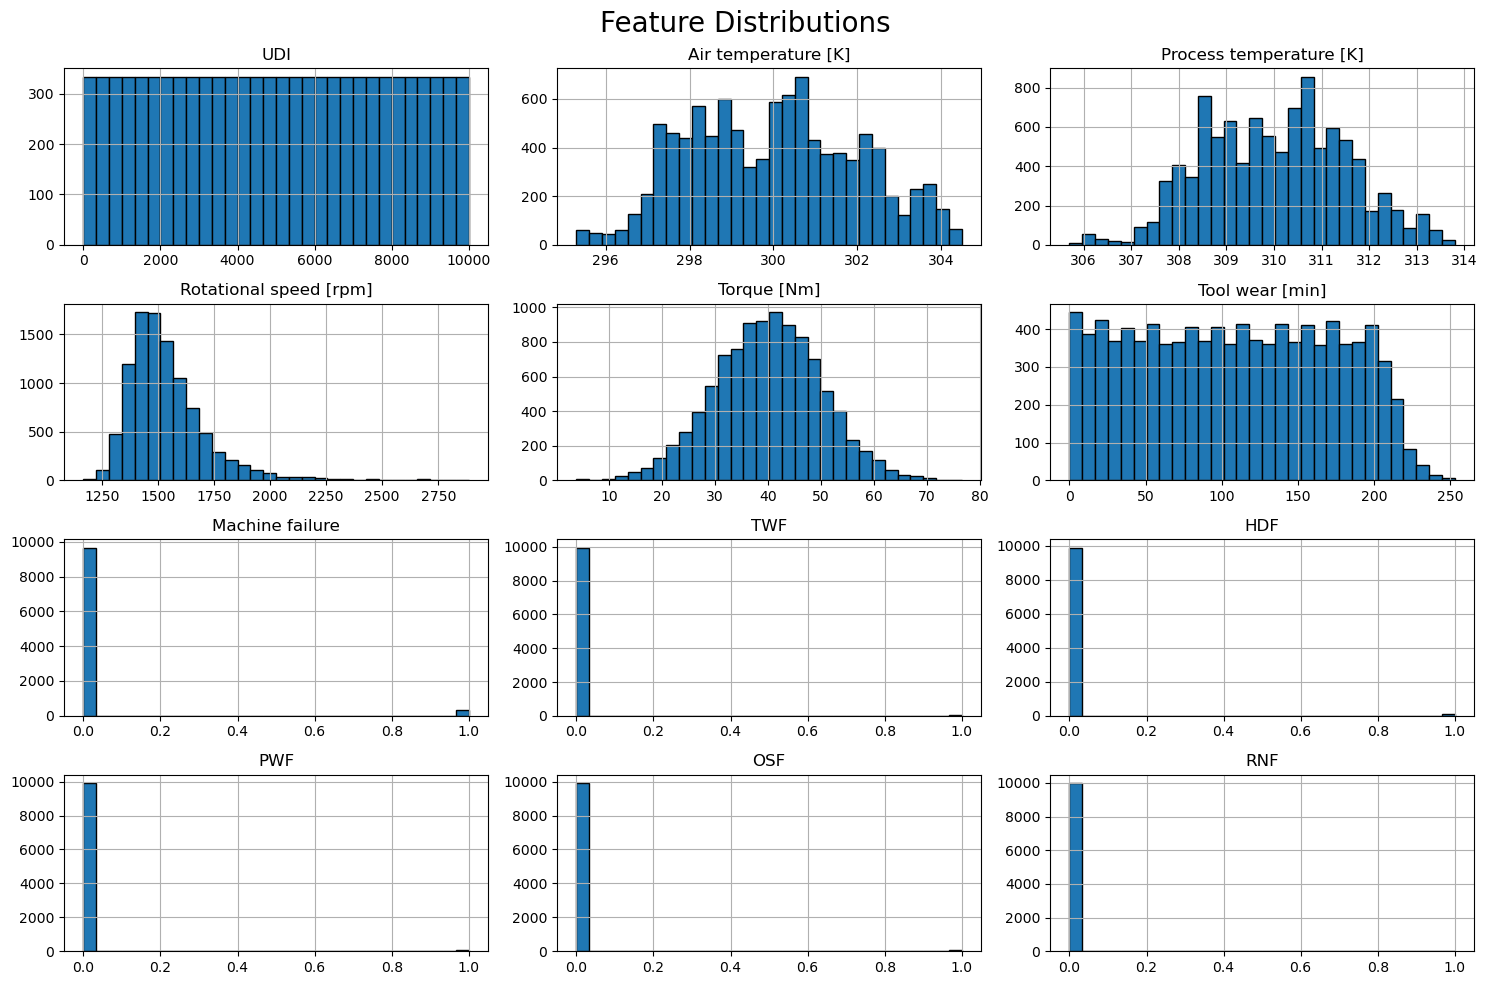

In [18]:
# a. Histograms of only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])  # only numeric
numeric_cols.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

*9. Failure type Descriptions:*
We will work on both binary and multi level classification to predict machine failure. 
 For binary classification machine Failure will be our target vaiable and for multi level classification the five failure types will be our target variables.

In [20]:
df[df['Machine failure'] == 1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


This displays a filtered set of machine failure positive instances only. For each failure case, the type of failure is identified from five distinct categories: TWF, HDF, PWF, OSF and RNF.

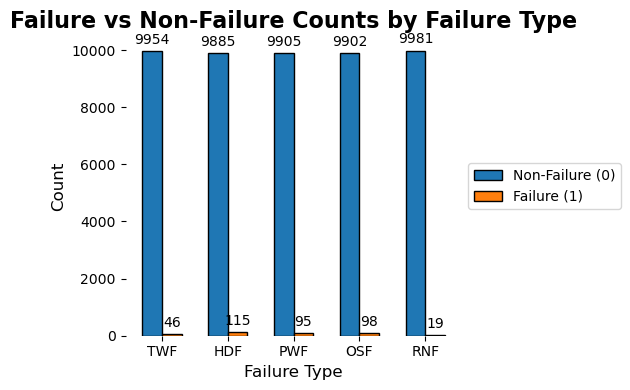

In [22]:
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
summary = {
    'Total': [df[col].count() for col in failure_cols],
    'Non-Failure (0)': [(df[col] == 0).sum() for col in failure_cols],
    'Failure (1)': [(df[col] == 1).sum() for col in failure_cols]
}
summary_df = pd.DataFrame(summary, index=failure_cols)
ax = summary_df[['Non-Failure (0)', 'Failure (1)']].plot(
    kind='bar',
    figsize=(6, 4),
    width=0.6,
    edgecolor='black'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title("Failure vs Non-Failure Counts by Failure Type", fontsize=16, weight='bold')
plt.xlabel("Failure Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()

**Data Preprocessing**

*1: Feature Importance selection steps*

*Drop unnecessary Columns (UID and Product ID) and encodeing(Type using label encoding)*

In [26]:
df.drop(columns=['UDI', 'Product ID'], inplace=True)
df['Type'] = LabelEncoder().fit_transform(df['Type'])#'L' → 0', M' → 1, 'H' → 2
numeric_cols = df.select_dtypes(include=['number'])
print(df.columns.tolist())

['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


*Correlation to discover patterns, relationships, and useful insights from data*

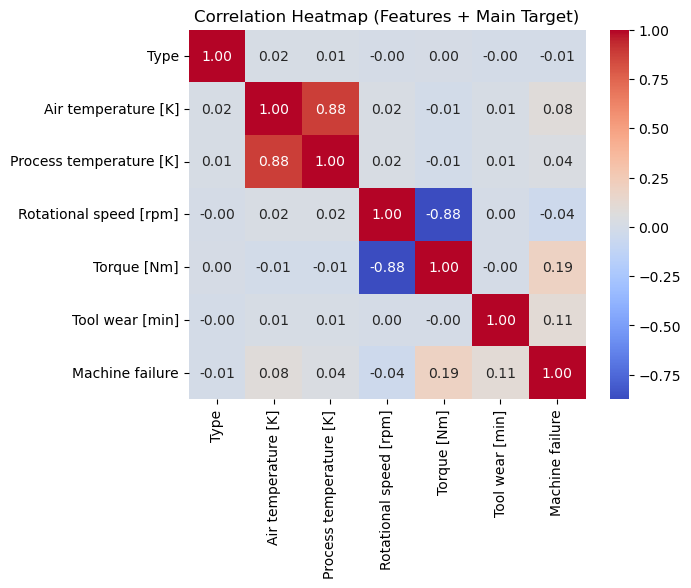

In [28]:
df_corr = df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Features + Main Target)")
plt.show()


*To make sure which valiable to drop or identify the importancy I will also check Feature Importance selection using Random forest classifier*

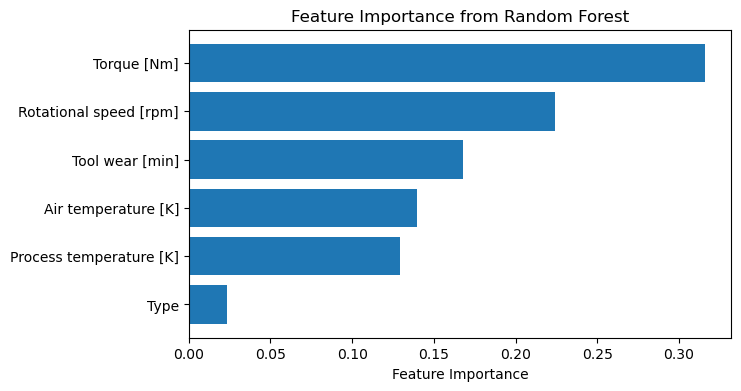

In [30]:
X = df.drop(['Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)  # Drop the target columns
y = df['Machine failure'] # Target variable
# Train a Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
# Plot
plt.figure(figsize=(7, 4))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


**Random forest or Heatmap**<br>
Random Forest feature importance is better than just looking at the heatmap.<br>
**Why?**<br>
Heatmap only shows linear correlations (straight-line relationships) but, Random Forest captures complex patterns (nonlinear relationships, interactions between variables)

In [32]:
df.drop(columns='Type', inplace=True)
print(df.columns.tolist())

['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


*2. Distribution of Machine failure (class imbalance) checking*

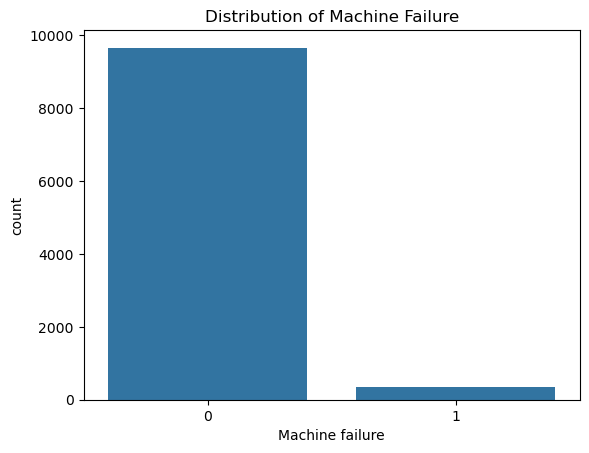

Machine failure
0    9661
1     339
Name: count, dtype: int64


In [34]:
sns.countplot(x='Machine failure', data=df)
plt.title('Distribution of Machine Failure')
plt.show()
print(df['Machine failure'].value_counts())

According the result in the above there is 96.6% non failure, so the data is imbalanced- For cheking performance accuracy is not necessary

 **Build and Train Models**

*1 :Binary Classification- Using the Machine failure main target Variable*

1: Split into Features and Target

In [39]:
X = df.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])  # Features (excluding the target column)
y = df['Machine failure']  # Target variable

2: Split into Training and Testing Sets

In [41]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For building my model- I will try using both Decsion tree and Random forest algorithms- then take the best fit

1 Decsion Tree

In [44]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='f1_macro')
print("\nCross-Validation F1 Scores (macro):", cv_scores)
print("Mean CV F1 Score: {:.4f}".format(np.mean(cv_scores)))
print("Std Dev CV F1 Score: {:.4f}".format(np.std(cv_scores)))
y_pred = dt_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print("\nTest Set Evaluation (F1-score and Support):")
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print(f"Class {label} - F1-score: {metrics['f1-score']:.4f}, Support: {metrics['support']}")


Cross-Validation F1 Scores (macro): [0.88291398 0.79426629 0.84098589 0.83447809 0.81215618]
Mean CV F1 Score: 0.8330
Std Dev CV F1 Score: 0.0300

Test Set Evaluation (F1-score and Support):
Class 0 - F1-score: 0.9894, Support: 1939.0
Class 1 - F1-score: 0.6870, Support: 61.0


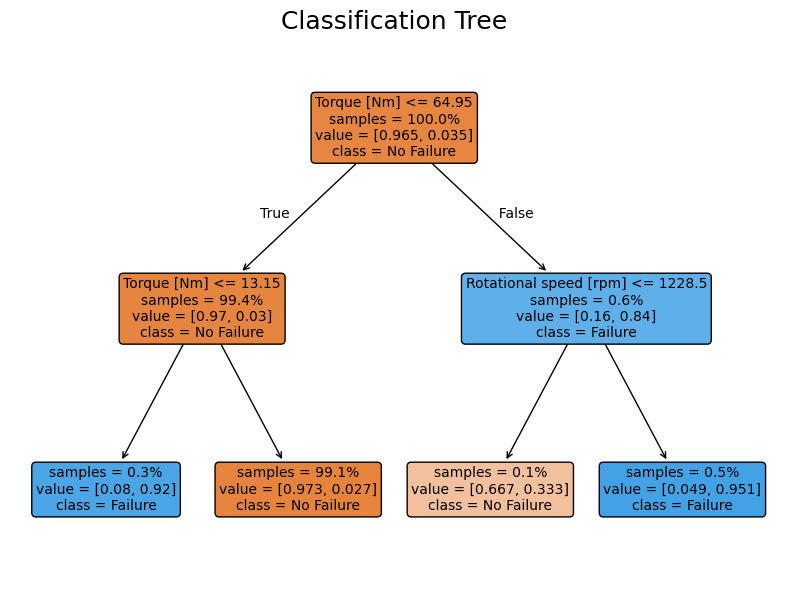

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dt_simple = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_simple.fit(X_train, y_train)
plt.figure(figsize=(8, 6))
plot_tree(
    dt_simple,
    feature_names=list(X.columns),
    class_names=['No Failure', 'Failure'],
    filled=True,
    rounded=True,
    fontsize=10,       
    impurity=False,    
    proportion=True, 
    label='all' 
)
plt.title('Classification Tree', fontsize=18)
plt.tight_layout()
plt.show()


Confusion Matrix for the decsion tree model

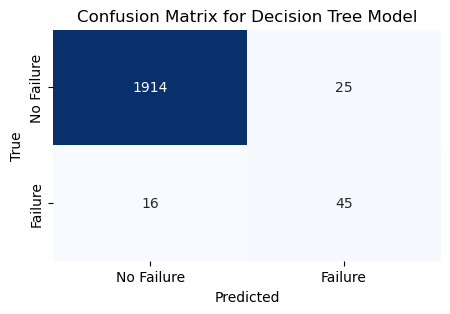

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

2: Random Forest

In [49]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
print("\nCross-Validation Results (F1-score):")
print(f"F1 Scores for each fold: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
y_pred_rf = rf_model.predict(X_test)
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["No Failure", "Failure"]))


Cross-Validation Results (F1-score):
F1 Scores for each fold: [0.68181818 0.51764706 0.72       0.58536585 0.68085106]
Mean F1 Score: 0.6371
Standard Deviation: 0.0745

Test Set Classification Report:
              precision    recall  f1-score   support

  No Failure       0.98      1.00      0.99      1939
     Failure       0.88      0.46      0.60        61

    accuracy                           0.98      2000
   macro avg       0.93      0.73      0.80      2000
weighted avg       0.98      0.98      0.98      2000



Confusion Matrix for the random forest model

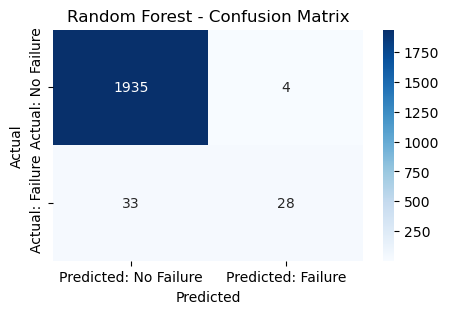

In [51]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted: No Failure', 'Predicted: Failure'],
            yticklabels=['Actual: No Failure', 'Actual: Failure'])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*Model Selection:
Based on the results of the confusion matrices of the Decision Tree and Random Forest models, the Random Forest model is the better choice.*

**Multiclass Classification**:, TWF, HDF, PWF, OSF, RNF as target features

Split the data

In [55]:
X = df.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])  # Features excluding targets and 'Machine failure'
y = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]  # Target variables as multiple columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model

In [57]:
def get_failure_type(row):
    if row['TWF'] == 1:
        return 'TWF'
    elif row['HDF'] == 1:
        return 'HDF'
    elif row['PWF'] == 1:
        return 'PWF'
    elif row['OSF'] == 1:
        return 'OSF'
    elif row['RNF'] == 1:
        return 'RNF'
    else:
        return 'No Failure' 
df['FailureType'] = df.apply(get_failure_type, axis=1)
df = df[df['FailureType'] != 'No Failure']
X = df.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'FailureType'])
y = df['FailureType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print("\nClassification Report (Multiclass Failure Type):")
print(classification_report(y_test, y_pred))


Classification Report (Multiclass Failure Type):
              precision    recall  f1-score   support

         HDF       0.92      0.92      0.92        24
         OSF       0.80      1.00      0.89        16
         PWF       1.00      0.80      0.89        20
         RNF       1.00      0.50      0.67         2
         TWF       0.78      0.88      0.82         8

    accuracy                           0.89        70
   macro avg       0.90      0.82      0.84        70
weighted avg       0.90      0.89      0.88        70



<Figure size 800x600 with 0 Axes>

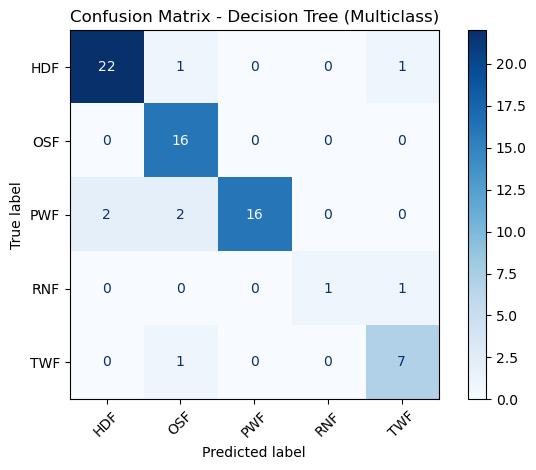

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Decision Tree (Multiclass)")
plt.tight_layout()
plt.show()

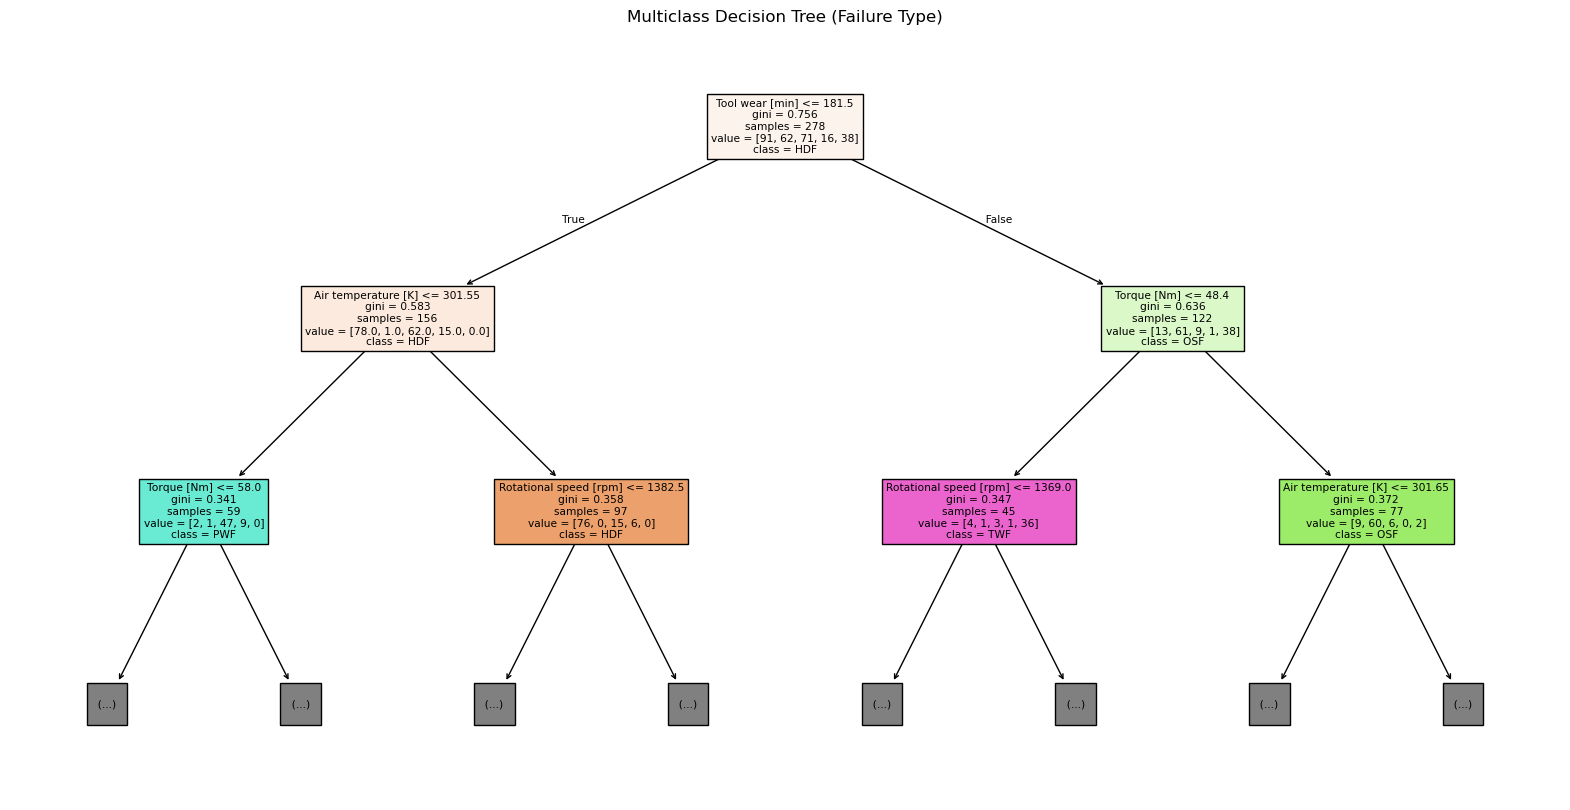

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True, max_depth=2)
plt.title("Multiclass Decision Tree (Failure Type)")
plt.show()

Random forest for multiclass classification

In [63]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Random Forest Classification Report:
              precision    recall  f1-score   support

         HDF       0.92      0.92      0.92        24
         OSF       0.80      1.00      0.89        16
         PWF       1.00      0.80      0.89        20
         RNF       1.00      0.50      0.67         2
         TWF       0.78      0.88      0.82         8

    accuracy                           0.89        70
   macro avg       0.90      0.82      0.84        70
weighted avg       0.90      0.89      0.88        70



<Figure size 800x600 with 0 Axes>

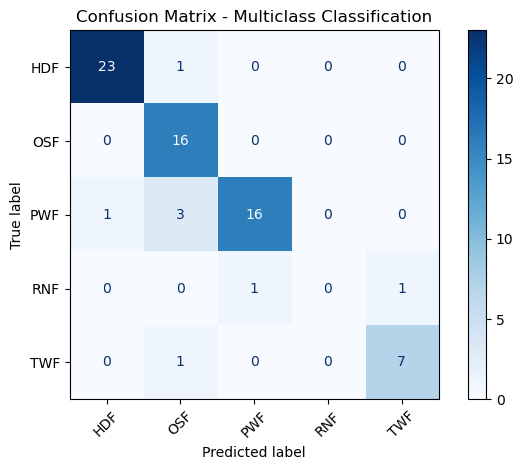

In [74]:
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Multiclass Classification")
plt.tight_layout()
plt.show()

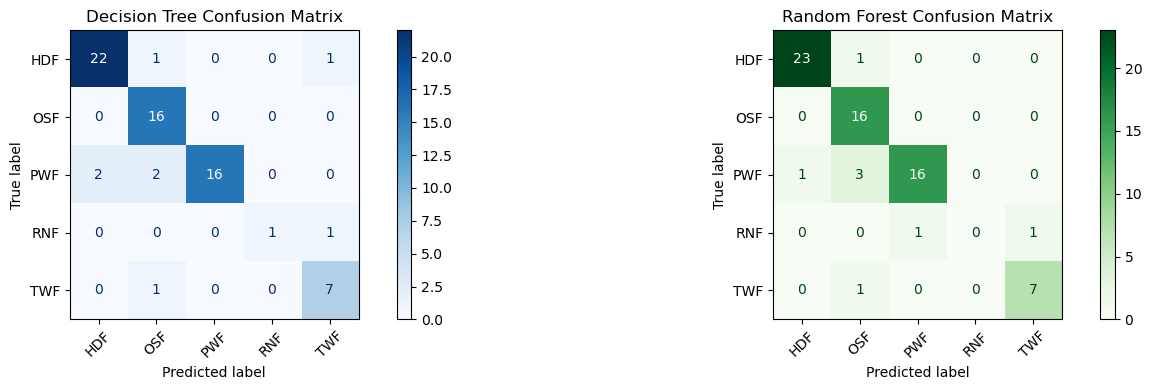

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
cm_dt = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot(ax=axs[0], cmap='Blues', xticks_rotation=45)
axs[0].set_title("Decision Tree Confusion Matrix")
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(ax=axs[1], cmap='Greens', xticks_rotation=45)
axs[1].set_title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

Conclusion: Random forest multiclass classification is the best model

**9: Receiver Operating Characteristic(ROC) curve**

ROC stands for Receiver Operating Characteristic curve.
It plots the True Positive Rate (Recall) against the False Positive Rate at different threshold settings.
AUC (Area Under the Curve) summarizes the ROC curve in a single number between 0 and 1. The closer to 1, the better the model.

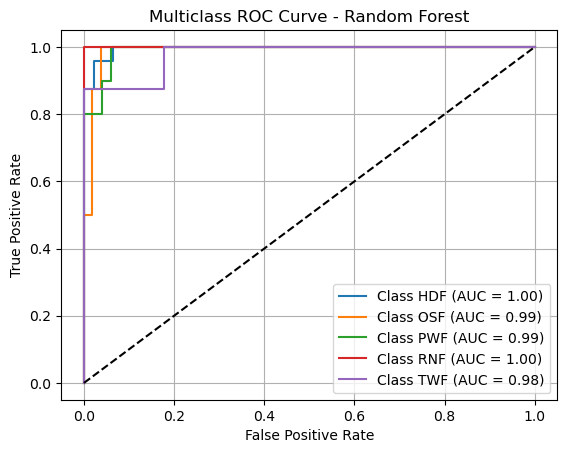

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=rf_model.classes_)  # shape: (n_samples, n_classes)
y_score_rf = rf_model.predict_proba(X_test)  # shape: (n_samples, n_classes)
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], y_score_rf[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc'
)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)
y_pred = best_rf.predict(X_test)
print("Classification Report for best RF model:")
print(classification_report(y_test, y_pred, zero_division=0))

C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best hyperparameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report for best RF model:
              precision    recall  f1-score   support

         HDF       0.96      0.96      0.96        24
         OSF       0.76      1.00      0.86        16
         PWF       0.94      0.80      0.86        20
         RNF       0.00      0.00      0.00         2
         TWF       0.88      0.88      0.88         8

    accuracy                           0.89        70
   macro avg       0.71      0.73      0.71        70
weighted avg       0.87      0.89      0.87        70



Save model

In [ ]:
import joblib
joblib.dump(rf_model, 'mrandom_forest_model.pkl')